# Convex functions

This section is devoted to **convex sets** and **convex functions**,
which have useful properties for optimization algorithms.

## Some special sets

### Lines and line segments

Points $y$ on a **line** through two points $x_1 \neq x_2$ in $\mathbb{R}^{n}$
can be expressed by

$$
y = \theta x_1 + (1 - \theta) x_2,
$$

or

$$
y = x_2 + \theta (x_1 - x_2),
$$

where $\theta \in \mathbb{R}$.

For a **line segment**, $\theta$ is limited to $0 \leq \theta \leq 1$.

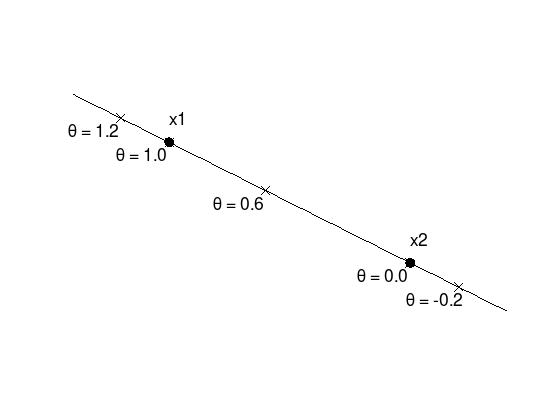

In [1]:
x1 = [0.0; 0.5];
x2 = [1.0; 0.0];
theta = linspace (-0.4, 1.4, 100);
y = @(t) x2 + t .* (x1 - x2);
yy = y(theta);
plot (yy(1,:), yy(2,:), 'k');
hold on;
tprops = {'FontSize', 18};
mprops = {'MarkerSize', 9, ...
          'MarkerFaceColor', 'black'};
for t = [1.2, 1, 0.6, 0, -0.2]
  yy = y(t);
  plot (yy(1), yy(2), 'kx', mprops{:});
  text (yy(1) - 0.22, yy(2) - 0.05, ...
        sprintf ('\\theta = %.1f', t), tprops{:});
end
plot (x1(1), x1(2), 'ko', mprops{:});
text (x1(1), x1(2) + 0.1, 'x1', tprops{:});
plot (x2(1), x2(2), 'ko', mprops{:});
text (x2(1), x2(2) + 0.1, 'x2', tprops{:});
axis equal;
axis off;

### Affine sets

An **affine set** contains the **line** through any two distinct points in the set.

For example the solution set of linear equations $\{x | Ax = b\}$ is affine.

Conversely, every affine set can be expressed as solution set of a system of linear equations.

### Convex sets

A **convex set** $C$ contains the **line segment** through any two distinct points in the set.

$$
x_1, x_2 \in C, \quad 0 \leq \theta \leq 1 \quad\implies\quad \theta x_1 + (1 - \theta) x_2 \in C.
$$

**Examples** (from {cite}`Boyd2004` (p. 24): first set is convex, the latter two not)

![convex_sets](res/convex_sets.png)

### Hyperplanes

Affine and convex sets of the form
$\{ x \in \mathbb{R}^{n} \colon  a^{T}x = b \}$ with normal vector $a \neq 0$.

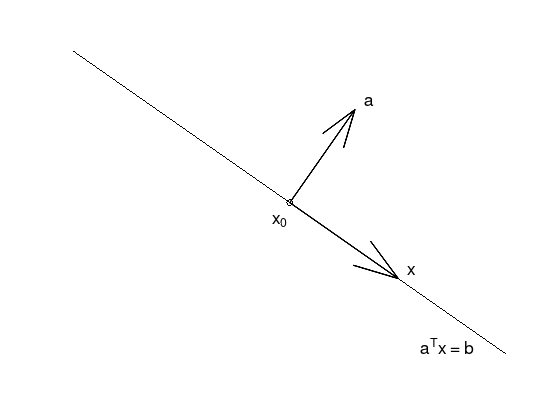

In [2]:
x1 = [0, 0.7];
x2 = [1, 0.0];
x0 = x1 + 0.5 .* (x2 - x1);
x = 0.25 .* (x2 - x1);
a = [0.15, 0.15 / x1(2)];
plot ([x1(1), x2(1)], [x1(2), x2(2)], 'k-');
hold on;
plot (x0(1), x0(2), 'ko');
quiver (x0(1), x0(2), a(1), a(2), 'k', 'LineWidth', 2);
quiver (x0(1), x0(2), x(1), x(2), 'k', 'LineWidth', 2);
tprops = {'FontSize', 18};
text (x0(1) - 0.04, x0(2) - 0.04, 'x_0', tprops{:});
text (x0(1) + a(1) + 0.02, x0(2) + a(2) + 0.02, 'a', tprops{:});
text (x0(1) + x(1) + 0.02, x0(2) + x(2) + 0.02, 'x', tprops{:});
text (x2(1) - 0.2, x2(2) + 0.02, 'a^{T}x = b', tprops{:});
axis equal;
axis off;

### Halfspaces

Convex sets of the form $\{ x \in \mathbb{R}^{n} \colon a^{T}x \leq b \}$
with normal vector $a \neq 0$.

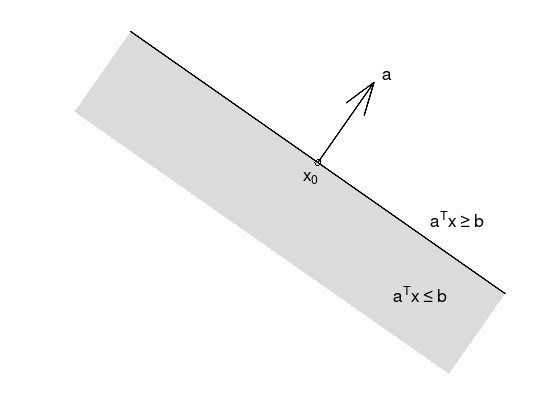

In [3]:
x1 = [0, 0.7];
x2 = [1, 0.0];
x0 = x1 + 0.5 .* (x2 - x1);
a = [0.15, 0.15 / x1(2)];
x3 = x1 - a;
x4 = x2 - a;
fill ([x1(1), x2(1), x4(1), x3(1)], [x1(2), x2(2), x4(2), x3(2)], ...
      [220, 220, 220] / 256, 'EdgeColor', 'none');
hold on;
plot ([x1(1), x2(1)], [x1(2), x2(2)], 'k-', 'LineWidth', 2);
plot (x0(1), x0(2), 'ko');
quiver (x0(1), x0(2), a(1), a(2), 'k', 'LineWidth', 2);
tprops = {'FontSize', 18};
text (x0(1) - 0.04, x0(2) - 0.04, 'x_0', tprops{:});
text (x0(1) + a(1) + 0.02, x0(2) + a(2) + 0.02, 'a', tprops{:});
text (x2(1) - 0.2, x2(2) + 0.2, 'a^{T}x \geq b', tprops{:});
text (x2(1) - 0.3, x2(2),       'a^{T}x \leq b', tprops{:});
axis equal;
axis off;

### Ellipsoid

Convex sets of the form

$$
\{ x \in \mathbb{R}^{n} \colon (x - x_{c})^{T} P^{-1} (x - x_{c}) \leq 1 \},
$$

with center $x_{c} \in \mathbb{R}^{n}$ and $P \succ 0$ (symmetric positive definite) or

$$
\{ x_{c} + Au \in \mathbb{R}^{n} \colon \lVert u \rVert \leq 1 \},
$$

with $A$ square and non-singular.

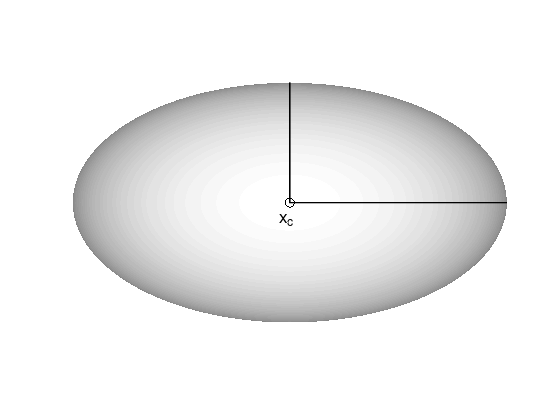

In [4]:
rx = 2;
ry = 0.7;
rz = 1;
[x, y, z] = ellipsoid (0, 0, 0, rx, ry, rz, 200);
colormap ('gray');
surf (x, y, z);
hold on;
plot3 ([0, rx], [0, 0], [1, 1], 'k-', 'LineWidth', 2);
plot3 ([0, 0], [0, ry], [1, 1], 'k-', 'LineWidth', 2);
plot3 (0, 0, 1, 'ko', 'MarkerSize', 9);
text  (-0.1, -0.1, 1, 'x_{c}', 'FontSize', 18);
shading flat;
view (0, 90);  % reduce to x-y-plane
xlim ([-rx, rx]);
ylim ([-1, 1]);
zlim ([-rz, rz]);
axis off;

### Polyhedra

A Polyhedron is an **intersection** of a finite number of
**halfspaces** and **hyperplanes**.

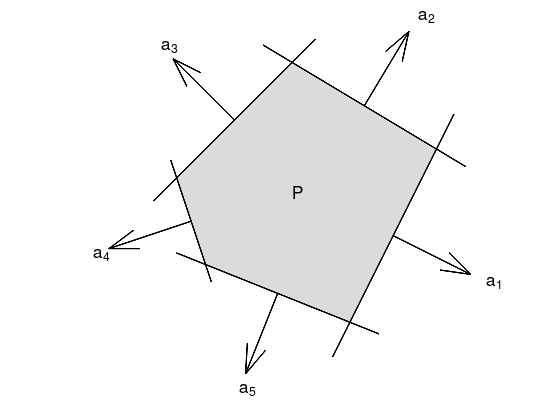

In [5]:
x1 = [ 0.0, 0.0];
x2 = [ 0.3, 0.6];
x3 = [-0.2, 0.9];
x4 = [-0.6, 0.5];
x5 = [-0.5, 0.2];
x = [x1; x2; x3; x4; x5];
fill (x(:,1), x(:,2), ...
      [220, 220, 220] / 256, ...
      'EdgeColor', 'none');
hold on;

tprops = {'FontSize', 18};
for i = 1:5
  j = mod (i, 5) + 1;
  p = @(t) x(i,:)' + t .* (x(j,:)' - x(i,:)');
  p0 = p(0.5);  % Start of normal vector
  p1 = p(-0.2);
  p2 = p(1.2);
  % Normal vector a
  d = 0.3;  % direction and scale
  if (x(i,1) < 0)
    d = -d;
  end
  a = (x(j,:)' - x(i,:)');
  a = [1; -a(1)/a(2)];
  a = a / norm (a) * d;
  plot ([p1(1), p2(1)], [p1(2), p2(2)], 'k-', 'LineWidth', 2);
  quiver (p0(1), p0(2), a(1), a(2), 'k', 'LineWidth', 2);
  t = p0 + 1.2 .* a;
  text (t(1), t(2), sprintf ('a_{%d}', i), tprops{:});
end

text (-0.2, 0.45, 'P', tprops{:});
axis equal;
axis off;

The **intersection** of convex sets is convex.

*Proof.*

Let $x_{1}, x_{2} \in C \cap D$, where $C$ and $D$ are convex sets.
Then $\theta x_{1} + (1 - \theta) x_{2} \in C \cap D$.

$$\tag*{$\Box$}$$

Solution set of finitely many linear inequalities and equalities is convex

$$
Ax \leq b, \qquad Cx = d,
$$

where $A \in \mathbb{R}^{m \times n}$, $C \in \mathbb{R}^{p \times n}$,
and $\leq$ is component-wise inequality.

## Convex functions

The function $f \colon \mathbb{R}^{n} \to \mathbb{R}$ is **convex**
if $\operatorname{dom}(f)$ is a convex set and

$$
f( \theta x + (1 - \theta) y ) \leq \theta f(x) + (1 - \theta)f(y),
$$

for all $x,y \in \operatorname{dom}(f)$ and $0 \leq \theta \leq 1$.

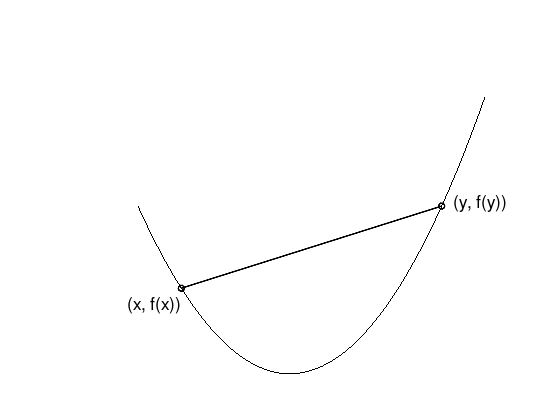

In [15]:
x = linspace (-0.7, 0.9, 50);
y = x.^2;
plot (x, y, 'k');
hold on;
plot ([-0.5, 0.7], [-0.5, 0.7].^2, 'ko-', 'LineWidth', 2);
text (-0.75, 0.2, '(x, f(x))', 'FontSize', 18);
text ( 0.75, 0.5, '(y, f(y))', 'FontSize', 18);
axis off;

- $f$ is **concave** if $-f$ is convex.

- $f$ is **strictly convex** if $\operatorname{dom}(f)$ is a convex set and

  $$
  f( \theta x + (1 - \theta) y ) < \theta f(x) + (1 - \theta)f(y),
  $$

  for all $x,y \in \operatorname{dom}(f)$, $x \neq y$, and $0 < \theta < 1$.

### Examples on $\mathbb{R}$

Convex:
- affine: $ax + b$ on $\mathbb{R}$, for any $a, b \in \mathbb{R}$
- exponential: $e^{ax}$, for any $a \in \mathbb{R}$
- powers: $x^{\alpha}$ on $\mathbb{R}_{++}$, for $\alpha \geq 1$ or $\alpha \leq 0$
- powers of absolute value: $\lvert x \rvert^{p}$ on $\mathbb{R}$, for $p \geq 1$
- negative entropy: $x\log(x)$ on $\mathbb{R}_{++}$

Concave:
- affine: $ax + b$ on $\mathbb{R}$, for any $a, b \in \mathbb{R}$
- powers: $x^{\alpha}$ on $\mathbb{R}_{++}$, for $0 \leq \alpha \leq 1$
- logarithm: $\log(x)$ on $\mathbb{R}_{++}$

### Examples on $\mathbb{R}^{n}$ (vectors)

- affine function $f(x) = a^{T}x + b$ are convex and concave
- norms are convex: $\lVert x \rVert_{p} = (\sum_{i = 1}^{n} \lvert x_i \rvert^{p} )^{1/p}$ for $p \geq 1$;
  $\lVert x \rVert_{\infty} = \max(\lvert x_1 \rvert, \ldots, \lvert x_n \rvert)$

### Examples on $\mathbb{R}^{m \times n}$ ($m \times n$ matrices)

- affine function

  $$
  f(X) = \operatorname{tr}A^{T}X + b = \left( \sum_{i = 1}^{m}\sum_{j = 1}^{n} A_{ij} X_{ij} \right) + b
  $$

- spectral (maximum singular value) norm

  $$
  f(X) = \lVert X \rVert_{2} = \sigma_{\max}(X) = \sqrt{\lambda_{\max}(X^{T}X)}.
  $$

:::{admonition} **Theorem 5:** Global minimum
:class: tip

Let $X \subset \mathbb{R}^{n}$ be a convex set
and $f \colon X \to \mathbb{R}$ a convex function,
then each **local minimum** is a **global minimum**.

:::

### First-order condition

Let $X \subset \mathbb{R}^{n}$ be a convex set
and $f \colon X \to \mathbb{R}$ a convex function,
then

$$
f(y) \;\geq\; f(x) + \nabla f(x)^{T}(y - x)
$$

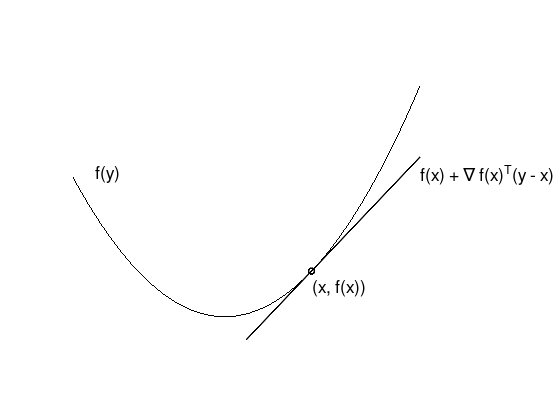

In [33]:
x = linspace (-0.7, 0.9, 50);
y = x.^2;
plot (x, y, 'k');
hold on;
plot ([0.1, 0.9], 0.8 .* [0.1, 0.9] - 0.16, 'k-', 'LineWidth', 2);
plot (0.4, 0.4^2, 'ko-', 'LineWidth', 2);
text (-0.6, 0.5, 'f(y)', 'FontSize', 18);
text ( 0.4, 0.1, '(x, f(x))', 'FontSize', 18);
text ( 0.9, 0.5, 'f(x) + \nabla f(x)^{T}(y - x)', 'FontSize', 18);
xlim ([-0.7, 1.3]);
axis off;